## Electricity Consumption Exploration

---

![](https://images.unsplash.com/photo-1487875961445-47a00398c267?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1650&q=80)
Photo by [Jason Blackeye](https://unsplash.com/photos/nyL-rzwP-Mk)

In this exercise, you will be asked to explore time series data in several ways.

You will be working with time series of Open Power System Data ([OPSD](https://open-power-system-data.org/)) for Germany. 

The data set includes daily electricity consumption, wind power production, and solar power production between 2006 and 2017. 
```
- Date — The date (yyyy-mm-dd format)
- Consumption — Electricity consumption in GWh
- Wind — Wind power production in GWh
- Solar — Solar power production in GWh
- Wind+Solar — Sum of wind and solar power production in GWh
```

# Data Exploration

In [97]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
import datetime as dt
import calendar

In [48]:
# Load file
df = pd.read_csv('opsd_germany_daily(1).csv')
df.head()

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN
3,2006-01-04,1457.217,NaN,NaN,NaN
4,2006-01-05,1477.131,NaN,NaN,NaN


In [49]:
# Description
df.describe()

,Consumption,Wind,Solar,Wind+Solar
count,4383.000000,2920.000000,2188.000000,2187.000000
mean,1338.675836,164.814173,89.258695,272.663481
std,165.775710,143.692732,58.550099,146.319884
min,842.395000,5.757000,1.968000,21.478000
25%,1217.859000,62.353250,35.179250,172.185500
50%,1367.123000,119.098000,86.407000,240.991000
75%,1457.761000,217.900250,135.071500,338.988000
max,1709.568000,826.278000,241.580000,851.556000


Then, make sure to transform the dates into datetime format in pandas :

In [50]:
# Transform the dates into datetime format
df['Date']= pd.to_datetime(df['Date'])
df.dtypes


Date           datetime64[ns]
Consumption           float64
Wind                  float64
Solar                 float64
Wind+Solar            float64
dtype: object

### 1. Plotting and understanding a time series

Q1 - Plot the different time series. What do you understand, what do you notice ?

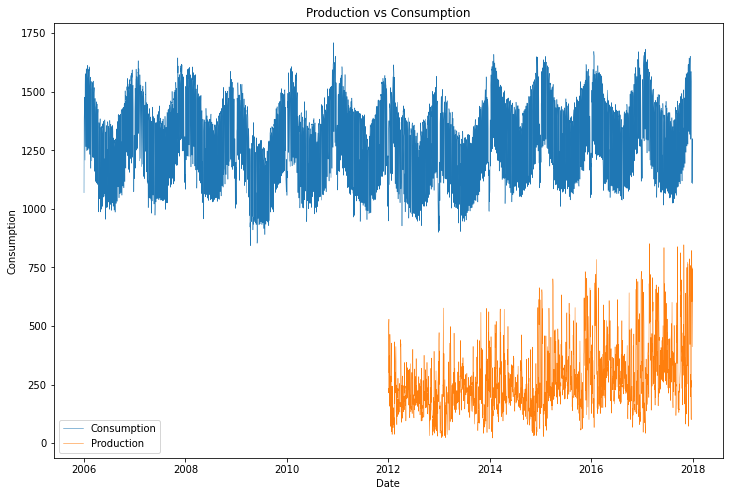

In [167]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Consumption', data=df,linewidth = 0.5)
sns.lineplot(x='Date', y='Wind+Solar', data=df,linewidth = 0.5)
plt.legend(labels=['Consumption','Production'])
plt.title('Production vs Consumption')
plt.show()

We can also avoid plotting lines and simply plot dots for the consumption :

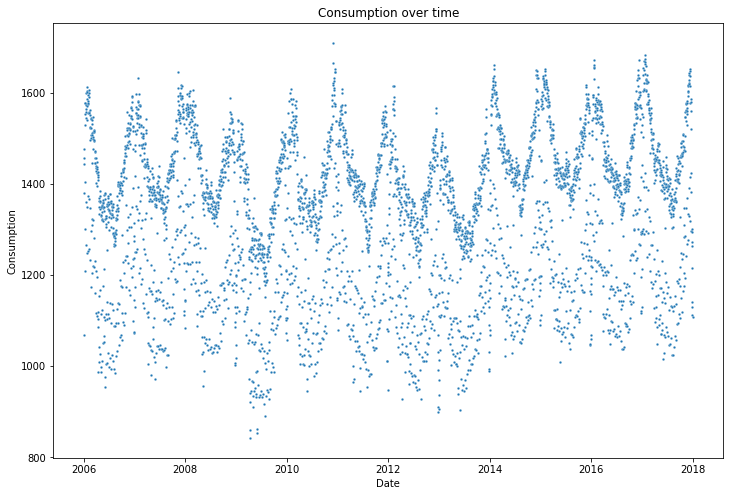

In [166]:
plt.figure(figsize=(12,8))
sns.scatterplot(x='Date', y='Consumption', data=df, s=6)
plt.title('Consumption over time')
plt.show()

And plot the production over time :

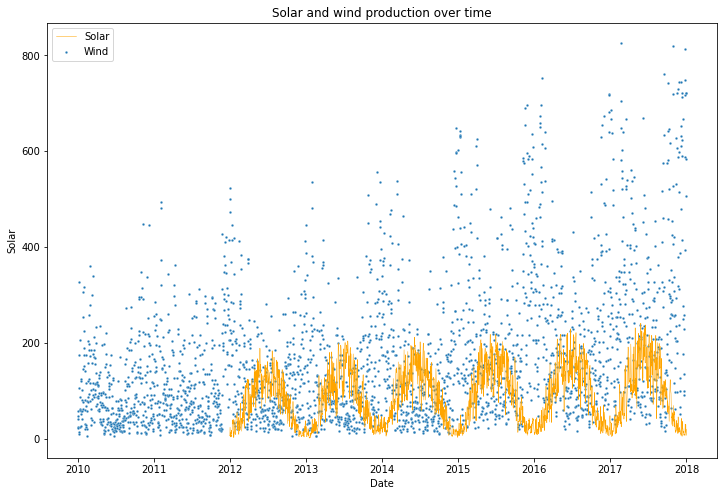

In [165]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Solar', data=df, color='orange', linewidth = 0.5)
sns.scatterplot(x='Date', y='Wind', data=df, s=6)
plt.title('Solar and wind production over time')
plt.legend(labels=['Solar','Wind'])
plt.show()

What can we notice ?
+ the consumption is larger than the production
+ we have no overall production data before 2012
+ the production and the consumption are both seasonal, i.e. they vary within a year given some pattern
+ there is a trend in production (the higher part), and outliers downwards

How do consumption and production compare ?
+ We notice that wind bsaed production increases over time, and is rather high in winter (for example more storms).
+ On the other hand, the solar production is higher in summer (seems logic)
+ The consumption is higher in winter

In [72]:
mask_2012 = (df['Date'] > '2011-12-31') & (df['Date'] <= '2019-1-1')
df.loc[mask_2012]

,Date,Consumption,Wind,Solar,Wind+Solar
2191,2012-01-01,948.12800,227.465,6.587,234.052
2192,2012-01-02,1269.58100,207.327,6.574,213.901
2193,2012-01-03,1334.74500,473.468,24.679,498.147
2194,2012-01-04,1347.13600,499.804,14.681,514.485
2195,2012-01-05,1376.65800,523.851,5.071,528.922
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


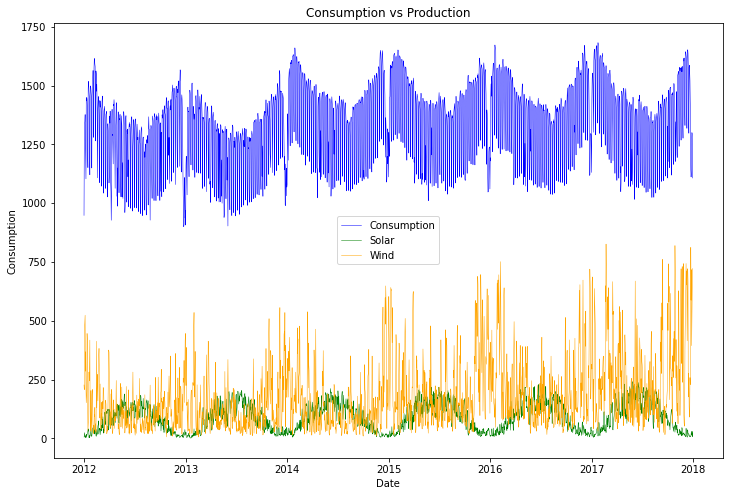

In [73]:
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Consumption', data=df.loc[mask_2012], color='blue', linewidth = 0.5)
sns.lineplot(x='Date', y='Solar', data=df.loc[mask_2012], color='green', linewidth = 0.5)
sns.lineplot(x='Date', y='Wind', data=df.loc[mask_2012], color='orange', linewidth = 0.5)
plt.title('Consumption vs Production')
plt.legend(labels=['Consumption','Solar','Wind'])
plt.show()

### 2. Change the scale

Q2 - Try to change the scale to understand the recurrent patterns !

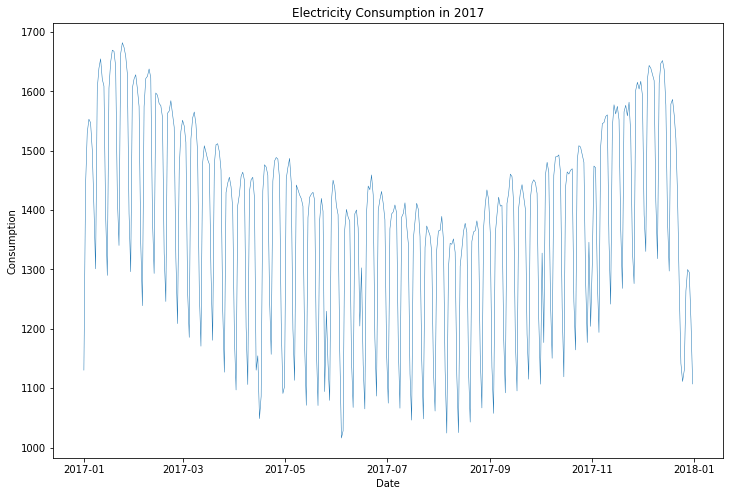

In [75]:
# Plot over the year
plt.figure(figsize=(12,8))
mask_2017 = (df['Date'] > '2016-12-31') & (df['Date'] <= '2017-12-31')
sns.lineplot(x='Date', y='Consumption', data=df.loc[mask_2017], linewidth = 0.5)
plt.title('Electricity Consumption in 2017')
plt.show()

It confirms the trend : more consumption in winter time, and less in summer. We can then zoom on a given month :

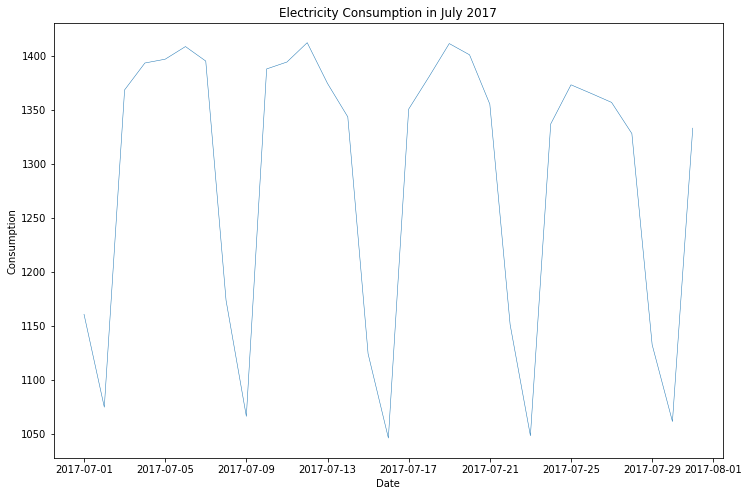

In [164]:
# Plot over a month
plt.figure(figsize=(12,8))
mask_2017_jul = (df['Date'] > '2017-6-30') & (df['Date'] <= '2017-7-31')
sns.lineplot(x='Date', y='Consumption', data=df.loc[mask_2017_jul], linewidth = 0.5)
plt.title('Electricity Consumption in July 2017')
plt.show()

When zooming on a month, we oberve another seasonality. There seems to be days of the week in which people consume less. For example, here's what happens when we highlight Sundays :

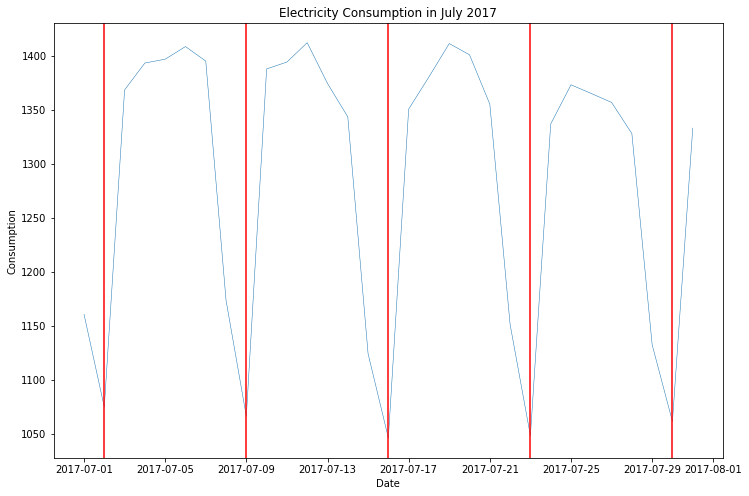

In [163]:
# Plot on Sundays
plt.figure(figsize=(12,8))
mask_2017_jul = (df['Date'] > '2017-6-30') & (df['Date'] <= '2017-7-31')
sns.lineplot(x='Date', y='Consumption', data=df.loc[mask_2017_jul], linewidth = 0.5)
plt.title('Electricity Consumption in July 2017')
plt.axvline(dt.datetime(2017, 7, 2), color='red')
plt.axvline(dt.datetime(2017, 7, 9), color='red')
plt.axvline(dt.datetime(2017, 7, 16), color='red')
plt.axvline(dt.datetime(2017, 7, 23), color='red')
plt.axvline(dt.datetime(2017, 7, 30), color='red')
plt.show()

### 3. Further exploration

Q3 - To further explore the dataset, we might need to group the data. Create new columns for the consumption (by year and month), and create box-plots with seaborn. Comment on your results.

In [162]:
# new columns 'year' and 'month'
df_2 = df.reset_index()
df_2['year'] = pd.DatetimeIndex(df['Date']).year
df_2['month'] = pd.DatetimeIndex(df['Date']).month
df_2['month_name'] = df_2['month'].apply(lambda x: calendar.month_abbr[x])
df_2=df_2.drop(['index'], axis=1)
df_2.head()

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,month_name
0,2006-01-01,1069.184,NaN,NaN,NaN,2006,1,Jan
1,2006-01-02,1380.521,NaN,NaN,NaN,2006,1,Jan
2,2006-01-03,1442.533,NaN,NaN,NaN,2006,1,Jan
3,2006-01-04,1457.217,NaN,NaN,NaN,2006,1,Jan
4,2006-01-05,1477.131,NaN,NaN,NaN,2006,1,Jan


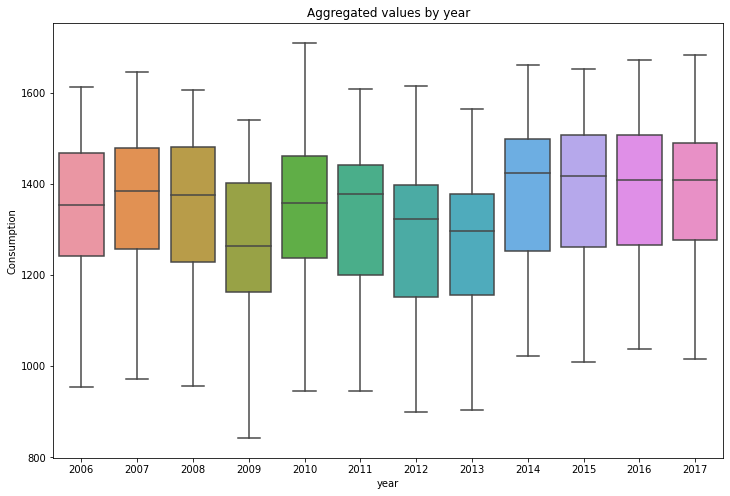

In [160]:
# Boxplot year
plt.figure(figsize=(12,8))
sns.boxplot(x='year', y='Consumption', data=df_2)
plt.title('Aggregated values by year')
plt.show()

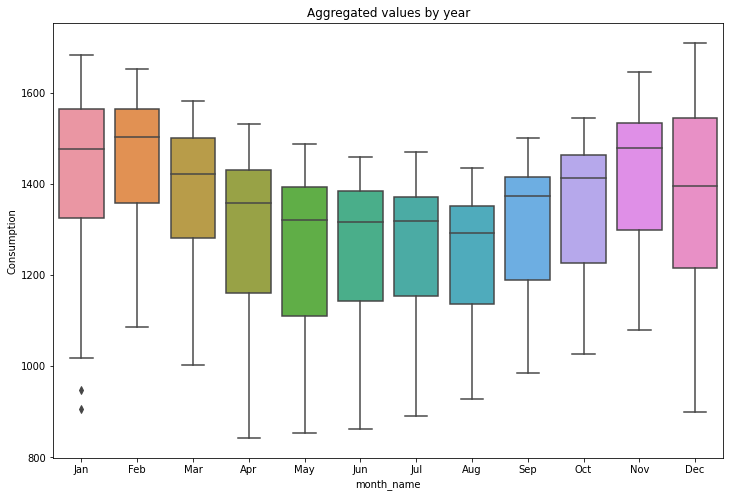

In [161]:
# Boxplot month
plt.figure(figsize=(12,8))
sns.boxplot(x='month_name', y='Consumption', data=df_2)
plt.title('Aggregated values by year')
plt.show()

### 4. Fill missing values

Q4 - Do you face missing values in production ? If yes, which method can you apply ? What happens if you plot the modified data ? It is a good idea to keep the data this way ?

In [125]:
df_noNA = df_2.fillna(method="backfill")
df_noNA

,Date,Consumption,Wind,Solar,Wind+Solar,year,month,month_name
0,2006-01-01,1069.18400,48.709,6.587,234.052,2006,1,Jan
1,2006-01-02,1380.52100,48.709,6.587,234.052,2006,1,Jan
2,2006-01-03,1442.53300,48.709,6.587,234.052,2006,1,Jan
3,2006-01-04,1457.21700,48.709,6.587,234.052,2006,1,Jan
4,2006-01-05,1477.13100,48.709,6.587,234.052,2006,1,Jan
...,...,...,...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037,2017,12,Dec
4379,2017-12-28,1299.86398,506.424,14.162,520.586,2017,12,Dec
4380,2017-12-29,1295.08753,584.277,29.854,614.131,2017,12,Dec
4381,2017-12-30,1215.44897,721.247,7.467,728.714,2017,12,Dec


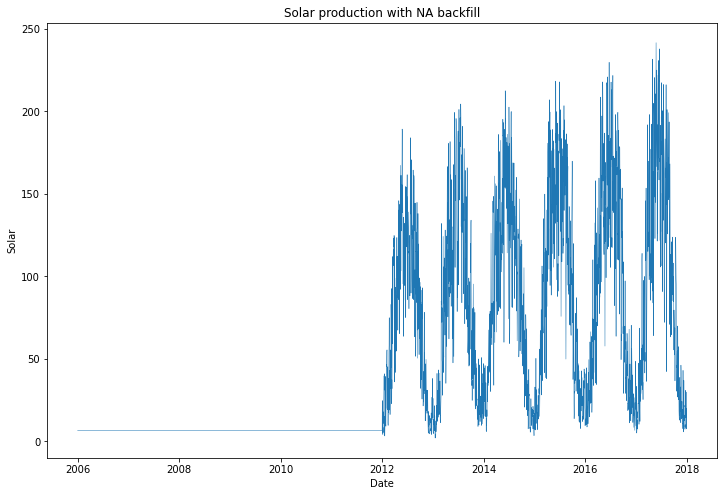

In [127]:
# Plot Solar
plt.figure(figsize=(12,8))
sns.lineplot(x='Date', y='Solar', data=df_noNA, linewidth = 0.5)
plt.title('Solar production with NA backfill')
plt.show()

The forward and backward fill are useful when some values are missing within the data, not when we miss years of data. This is a clear illustration.

### 5. Series correlation

Q5 - A good way to explore time series, when you have several series, is to plot one series vs another. This is a good way to estimate the correlation between 2 series. Plot the relevant graphs (and compute the correlation) for wind + solar vs consumption, wind vs solar, wind vs consumption, and solar vs consumption.

In [144]:
# Correlation between consumption and overall production
correlation = df.corr(method='pearson')
correlation
correlation.loc['Wind+Solar','Consumption']

0.02764784385923743

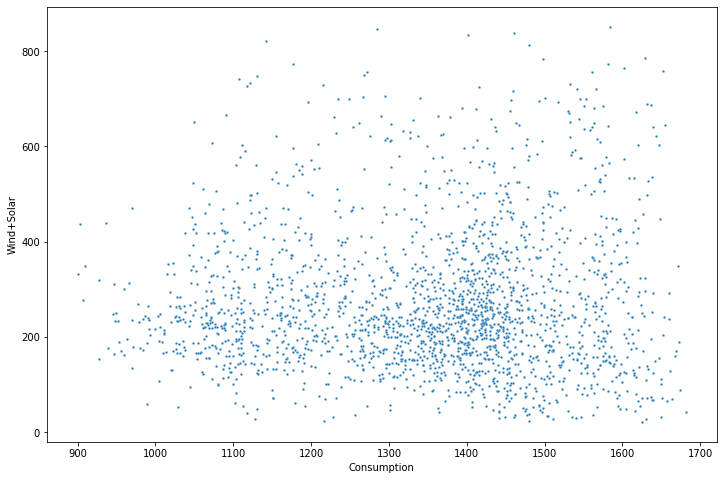

In [148]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Consumption', y='Wind+Solar', data=df, s=6)
plt.show()

In [150]:
# Correlation between solar production and wind production
correlation.loc['Solar','Wind']

-0.3088318295977332

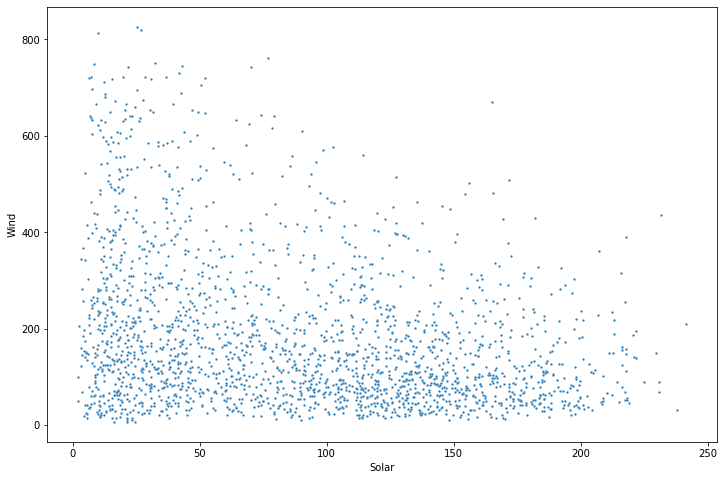

In [151]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Solar', y='Wind', data=df, s=6)
plt.show()

In [154]:
# Correlation between consumption and wind production
correlation.loc['Wind','Consumption']

0.1368207580976623

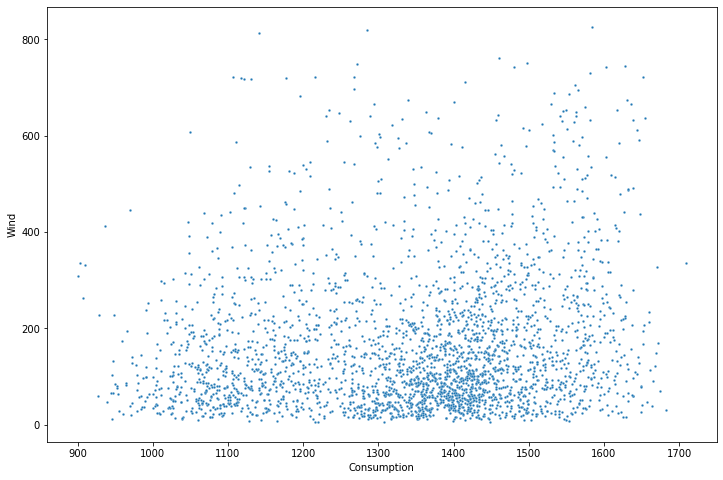

In [152]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Consumption', y='Wind', data=df, s=6)
plt.show()

In [155]:
# Correlation between consumption and solar production
correlation.loc['Solar','Consumption']

-0.278942655199145

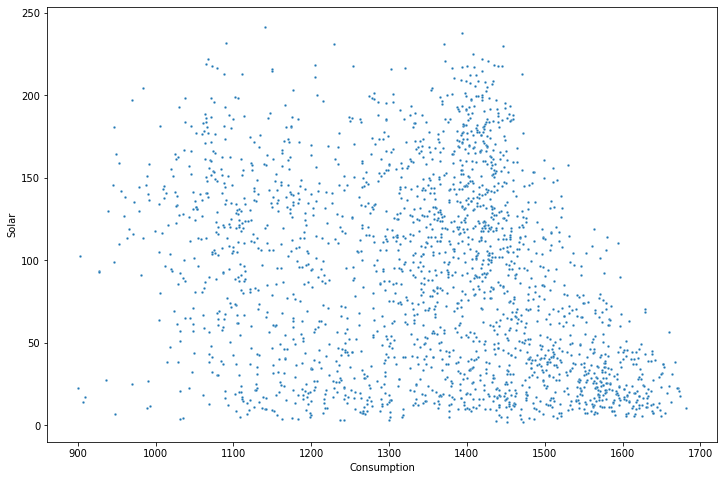

In [157]:
# Plot
plt.figure(figsize=(12,8))
sns.scatterplot(x='Consumption', y='Solar', data=df, s=6)
plt.show()